   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

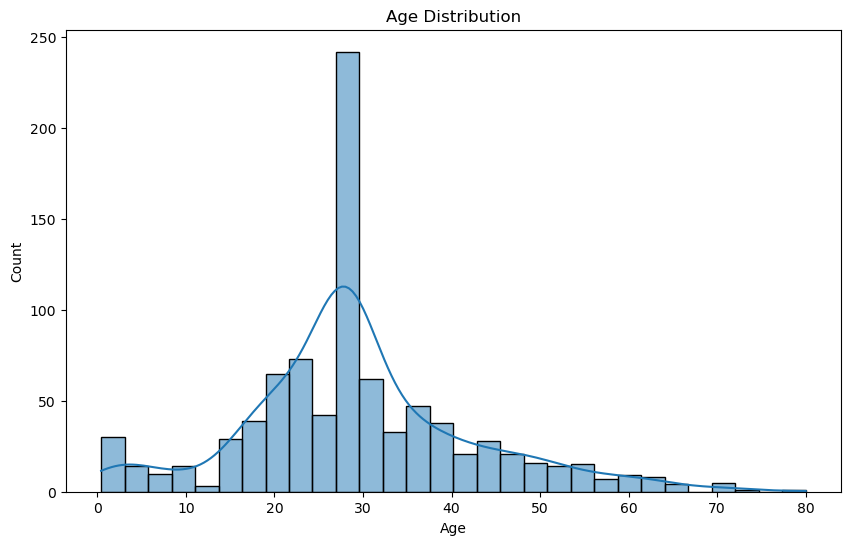

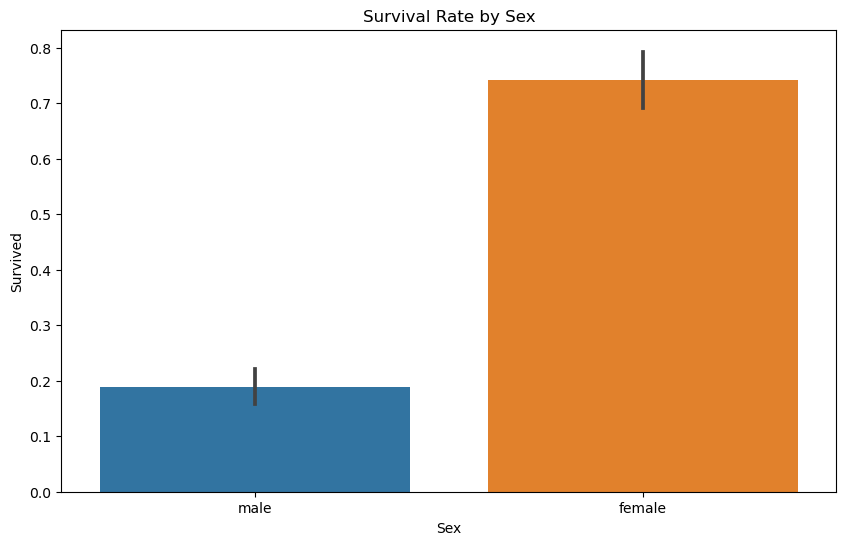

Accuracy: 0.81


In [1]:
# Step 1: Load the dataset
import pandas as pd

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

# Step 2: Perform basic data exploration
print(titanic_df.head())
print(titanic_df.info())
print(titanic_df.describe())

# Step 3: Handle missing values
# Fill missing values in 'Age' with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most common port
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

# Step 4: Perform data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Visualize the survival rate by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Sex')
plt.show()

# Step 5: Build a simple machine learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert categorical variables to dummy variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target variable
X = titanic_df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = titanic_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

In [2]:
from sklearn.metrics import confusion_matrix, classification_report

# Show the test data results
print("Test Data Results:")
print(y_pred)

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Compute and display the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Test Data Results:
[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]

Confusion Matrix:
[[90 15]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [3]:
import joblib
import numpy as np

# Save the model to a file
joblib.dump(model, 'titanic_model.pkl')

# Load the model from the file
loaded_model = joblib.load('titanic_model.pkl')

# Generate synthetic data
# Assuming the synthetic data has the same structure as X_test
synthetic_data = np.array([
    [3, 25.0, 0, 0, 7.25, True, False, True],
    [1, 45.0, 1, 0, 52.0, False, False, True],
    [2, 30.0, 0, 0, 13.0, True, False, False]
])

# Convert synthetic data to DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=X_test.columns)

# Make predictions on synthetic data
synthetic_predictions = loaded_model.predict(synthetic_df)

print("Synthetic Data Predictions:")
print(synthetic_predictions)

Synthetic Data Predictions:
[0 1 0]


In [ ]:
# Use the official Python image from the Docker Hub
FROM python:3.9-slim

# Set the working directory
WORKDIR /app

# Copy the requirements file into the container
COPY requirements.txt .

# Install the required packages
RUN pip install --no-cache-dir -r requirements.txt

# Copy the rest of the application code into the container
COPY . .

# Expose the port the app runs on
EXPOSE 8000

# Command to run the FastAPI app using uvicorn
CMD ["uvicorn", "app:app", "--host", "0.0.0.0", "--port", "8000"]

In [5]:
!docker build -t titanic-app .

ERROR: error during connect: Head "http://%2F%2F.%2Fpipe%2FdockerDesktopLinuxEngine/_ping": open //./pipe/dockerDesktopLinuxEngine: The system cannot find the file specified.


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel

# Initialize the FastAPI app
app = FastAPI()

# Define the input data model
class Passenger(BaseModel):
    Pclass: int
    Age: float
    SibSp: int
    Parch: int
    Fare: float

# Define the prediction function
def predict_survival(data: Passenger):
    # Convert the input data to a DataFrame
    input_data = pd.DataFrame([data.dict()])
    
    # Convert categorical variables to dummy variables
    input_data = pd.get_dummies(input_data, columns=['Pclass'], drop_first=True)
    